# Import Library

In [28]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Data

In [29]:
# load data
df = pd.read_csv('job_data.csv')

# check
df.head()

,job_title,company_name,location,job_description,job_link,skills
0,system analyst,tog indonesia,yogyakarta,"responsibilities deploy, maintain, and trouble...",https://www.linkedin.com/jobs/view/4076765593/...,"['statistics', 'communication']"
1,data analyst,tukr,jakarta,tukr is a rapidly expanding renewable commodit...,https://www.linkedin.com/jobs/view/4080741810/...,['erp']
2,supply chain supervisor,seven retail group,jakarta,job responsibility: create the company's suppl...,https://www.linkedin.com/jobs/view/4089476927/...,"['project management', 'problem solving']"
3,data scientist,provenir,jakarta,who we are provenir is a global fintech compa...,https://www.linkedin.com/jobs/view/4076157340/...,"['python', 'machine learning', 'scikit-learn',..."
4,head of product (data),htc global services,jakarta,formal education and work experience : bachelo...,https://www.linkedin.com/jobs/view/4099353940/...,"['kanban', 'communication', 'collaboration']"


# EDA

## TOP 5

### Top 5 Location

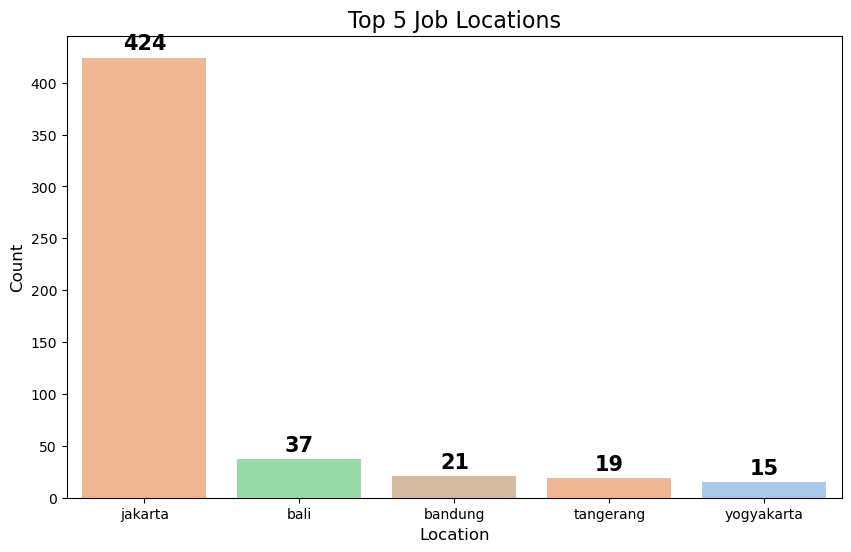

In [16]:
top_5_location = df['location'].value_counts().head()

plt.figure(figsize=(10, 6)) 
ax=sns.countplot(data=df, x='location', order=top_5_location.index, palette='pastel',hue='location') 
plt.title('Top 5 Job Locations',fontsize=16) 
plt.xlabel('Location',fontsize=12)
plt.ylabel('Count',fontsize=12)

for p in ax.patches: 
    height = p.get_height() 
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                fontsize=15, fontweight='bold',ha='center', va='center', 
                xytext=(0,10), textcoords='offset points')
    
plt.show()

Dari analisis ini, terlihat bahwa Jakarta memiliki jumlah peluang kerja yang jauh lebih tinggi dibandingkan dengan kota-kota lainnya. Hal ini dikarenakan Jakarta walaupun sudah bukan sebagai ibu kota Indonesia, masih menjadi [pusat bisnis dan pemerintahan](https://m.beritajakarta.id/en/read/43425/fithra-faisal-jakarta-remains-as-business-and-economic-center), sehingga banyak perusahaan besar dan kantor pemerintahan yang berlokasi di sana.

Sebaliknya, kota-kota seperti Bali, Bandung, Tangerang, dan Yogyakarta menunjukkan jumlah peluang kerja yang jauh lebih rendah, meskipun kota-kota ini juga memiliki daya tarik dan sektor industri masing-masing. Bali, misalnya, terkenal dengan sektor pariwisatanya, sedangkan Bandung dikenal dengan industri kreatif dan Tangerang sebagai kota satelit yang berkembang pesat.

#### Most Job In Top 5 Location

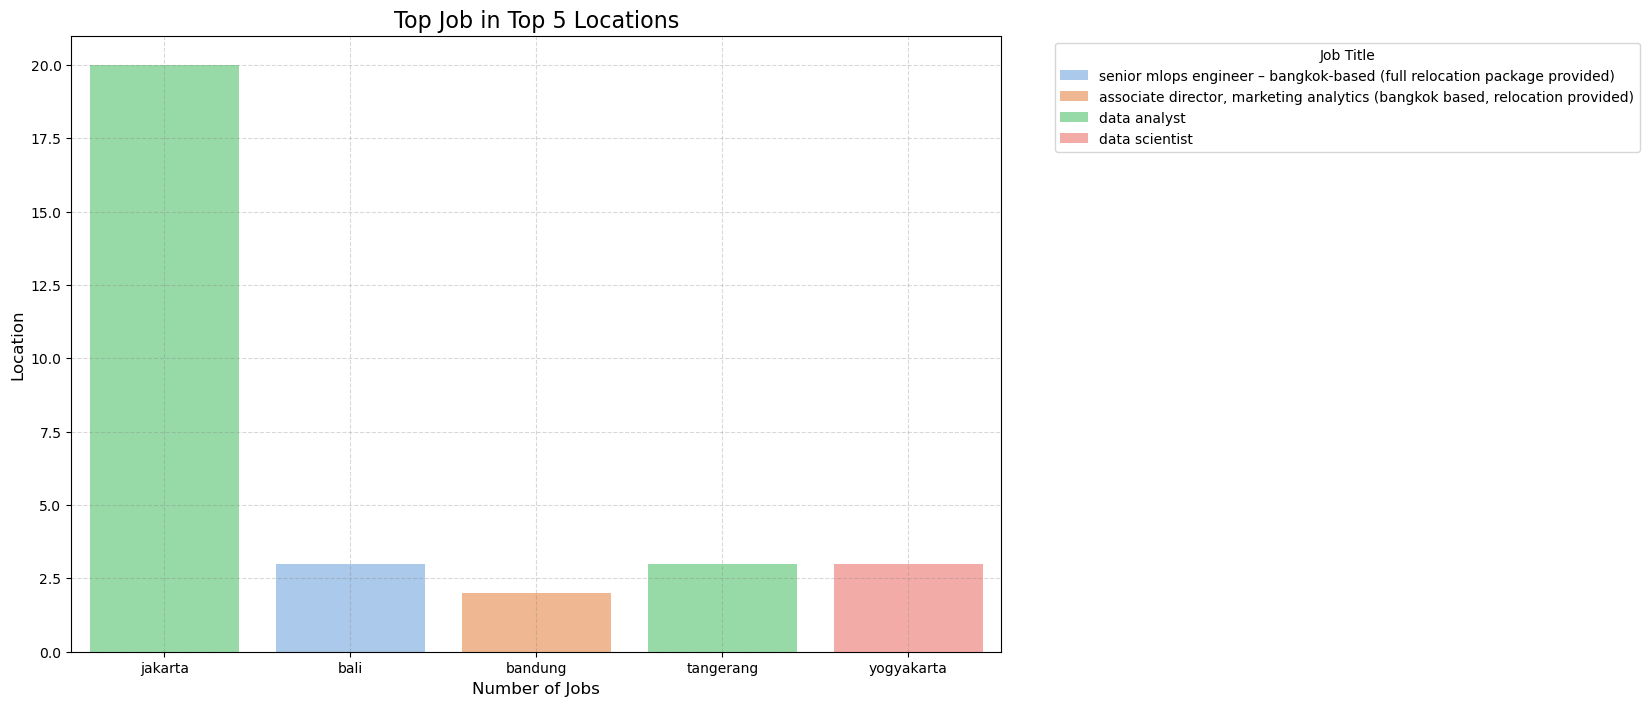

In [27]:

# Mengelompokkan data berdasarkan 'location' dan menghitung jumlah lowongan
location_counts = df.groupby('location').size().reset_index(name='counts')

# Mendapatkan top 5 lokasi dengan lowongan pekerjaan terbanyak
top_5_locations = location_counts.nlargest(5, 'counts')

# Filter DataFrame asli untuk hanya menyertakan top 5 lokasi
filtered_df = df[df['location'].isin(top_5_locations['location'])]

# Mengelompokkan data berdasarkan 'location' dan 'job_title' lalu menghitung jumlah lowongan
job_counts_per_location = filtered_df.groupby(['location', 'job_title']).size().reset_index(name='job_counts')

# Mendapatkan pekerjaan paling banyak di setiap top 5 lokasi
top_jobs_per_location = job_counts_per_location.loc[job_counts_per_location.groupby('location')['job_counts'].idxmax()]

# Buat visualisasi
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='job_counts', x='location', hue='job_title', data=top_jobs_per_location,order=top_5_location.index, palette='pastel')
plt.title('Top Job in Top 5 Locations',fontsize=16)
plt.xlabel('Number of Jobs',fontsize=12)
plt.ylabel('Location',fontsize=12)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)

plt.show()

Dari top 5 location dengan lowongan terbanyak, terlihat bahwa kawasan di Jakarta dan Tanggerang lowongan untuk Data Analyst menjadi lowongan yang paling banyak dibuka. Akan tetapi peluang pekerjaan untuk data analyst jauh lebih tinggi di Jakarta dibanding dengan tanggerang. 

Untuk Data 

### Top 5 Skill

In [18]:
df['skills'] = df['skills'].apply(eval)
exploded_df = df.explode('skills')
skill_counts = exploded_df['skills'].value_counts().head(5)

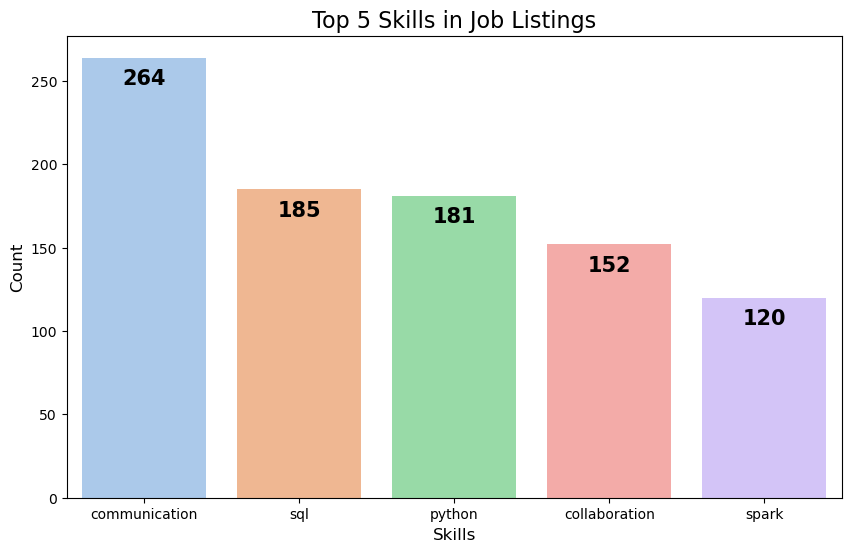

In [19]:
skill_df = skill_counts.reset_index()
skill_df.columns = ['skill', 'count']

plt.figure(figsize=(10, 6))
ax=sns.barplot(x='skill', y='count', data=skill_df, palette='pastel', hue='skill')
plt.title('Top 5 Skills in Job Listings',fontsize=16)
plt.xlabel('Skills',fontsize=12)
plt.ylabel('Count',fontsize=12)
for p in ax.patches: 
    height = p.get_height() 
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                fontsize=15, fontweight='bold',ha='center', va='center', 
                xytext=(0,-15), textcoords='offset points')
plt.show()


### Top 5 Companies

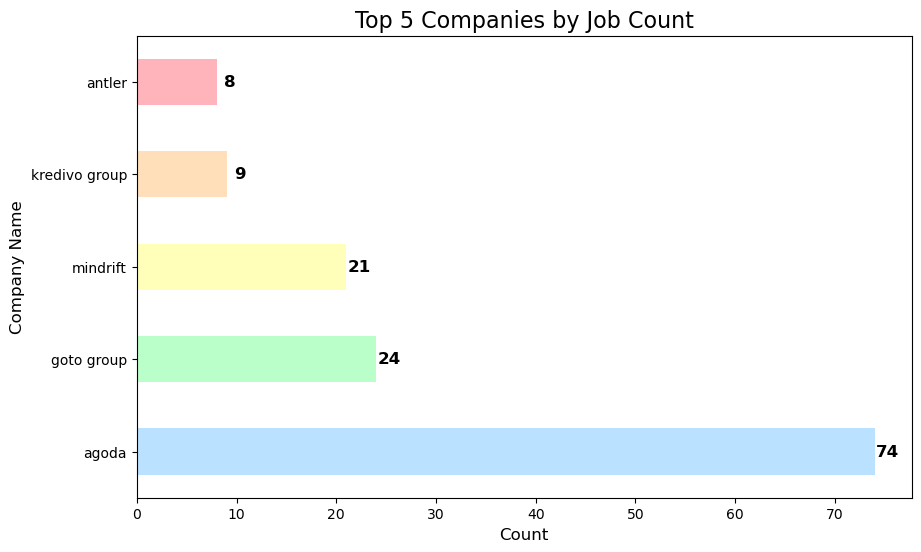

In [20]:
# Get the top 5 companies by job count
top_5_companies = df['company_name'].value_counts().head()

# Plot the top 5 companies as a horizontal bar chart
plt.figure(figsize=(10, 6))
ax=top_5_companies.plot(kind='barh', color=['#bae1ff', '#baffc9', '#ffffba', '#ffdfba', '#ffb3ba'])
plt.title('Top 5 Companies by Job Count',fontsize=16)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Company Name',fontsize=12)
for i in ax.patches: plt.text(i.get_width() + 1.3, i.get_y() + i.get_height() / 2, str(int(i.get_width())),
                               fontsize=12, fontweight='bold', ha='center', va='center')
plt.show()

### Top 5 Job

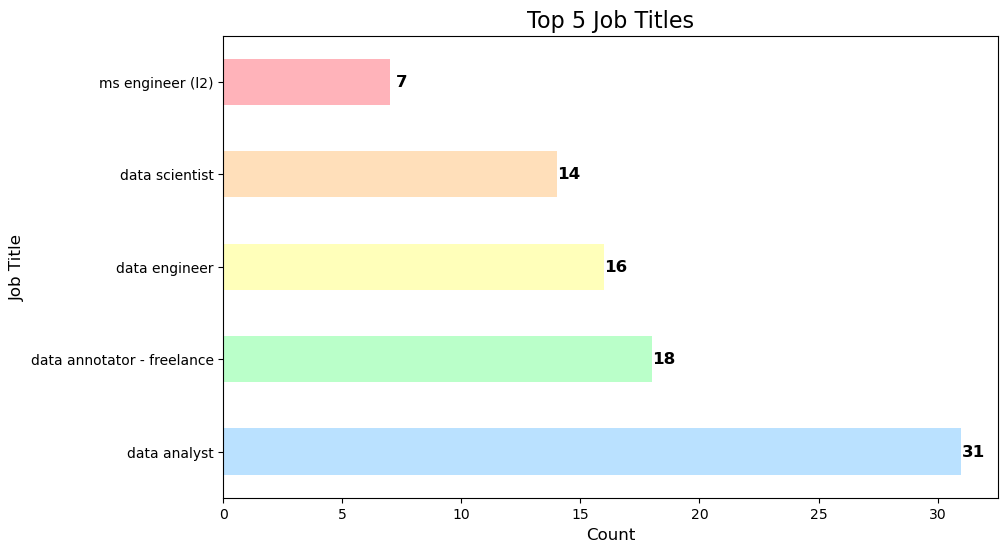

In [21]:
# Get the top 5 companies by job count
top_5_job_titles = df['job_title'].value_counts().head()

# Plot the top 5 job titles as a horizontal bar chart
plt.figure(figsize=(10, 6))
ax=top_5_job_titles.plot(kind='barh', color=['#bae1ff', '#baffc9', '#ffffba', '#ffdfba', '#ffb3ba'])
plt.title('Top 5 Job Titles',fontsize=16)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Job Title',fontsize=12)
for i in ax.patches: plt.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2, str(int(i.get_width())),
                               fontsize=12, fontweight='bold', ha='center', va='center')
plt.show()

### Top 5 Job in Jabodetabek

In [22]:
# Fungsi untuk mendapatkan top 5 pekerjaan di wilayah tertentu
def get_top_jobs_in_city(city_name, df, top_n=5):
    city_df = df[df['location'].str.contains(city_name, case=False, na=False)]
    top_jobs = city_df['job_title'].value_counts().head(top_n)
    return top_jobs

# Dapatkan top 5 pekerjaan di setiap wilayah
top_jobs_jakarta = get_top_jobs_in_city('jakarta', df)
top_jobs_bogor = get_top_jobs_in_city('bogor', df)
top_jobs_depok = get_top_jobs_in_city('depok', df)
top_jobs_tangerang = get_top_jobs_in_city('tangerang', df)
top_jobs_bekasi = get_top_jobs_in_city('bekasi', df)


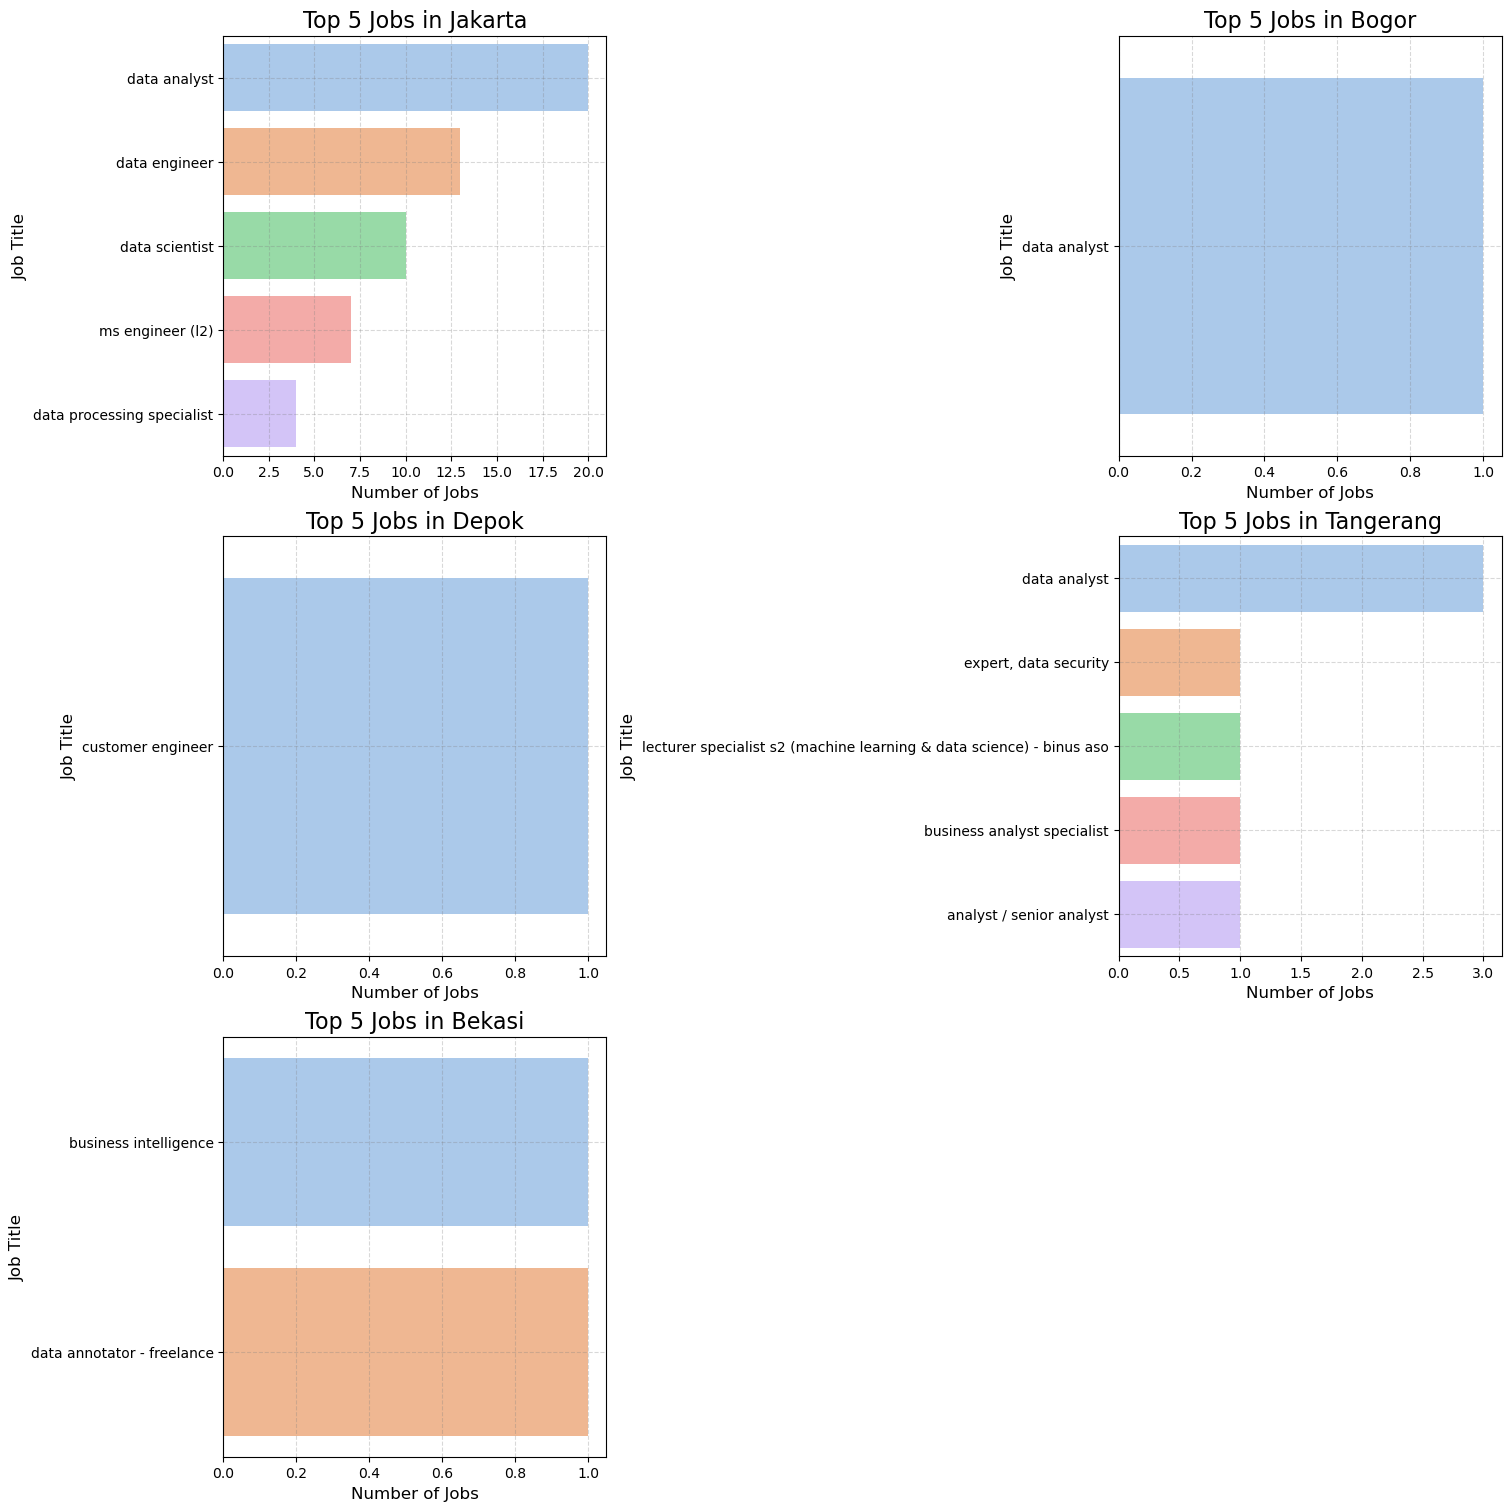

In [23]:

# Buat subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), constrained_layout=True)

# Daftar kota dan data pekerjaan
cities_and_jobs = [
    ('Jakarta', top_jobs_jakarta),
    ('Bogor', top_jobs_bogor),
    ('Depok', top_jobs_depok),
    ('Tangerang', top_jobs_tangerang),
    ('Bekasi', top_jobs_bekasi)
]

# Plot setiap top job di subplot
for ax, (city_name, top_jobs) in zip(axes.flatten(), cities_and_jobs):
    sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='pastel', hue=top_jobs.index, ax=ax)
    ax.set_title(f'Top 5 Jobs in {city_name.capitalize()}', fontsize=16)
    ax.set_xlabel('Number of Jobs', fontsize=12)
    ax.set_ylabel('Job Title', fontsize=12)
    ax.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)


# Matikan axis kosong
for ax in axes.flatten()[len(cities_and_jobs):]:
    ax.axis('off')

plt.show()


## Word Cloud

### Job Title

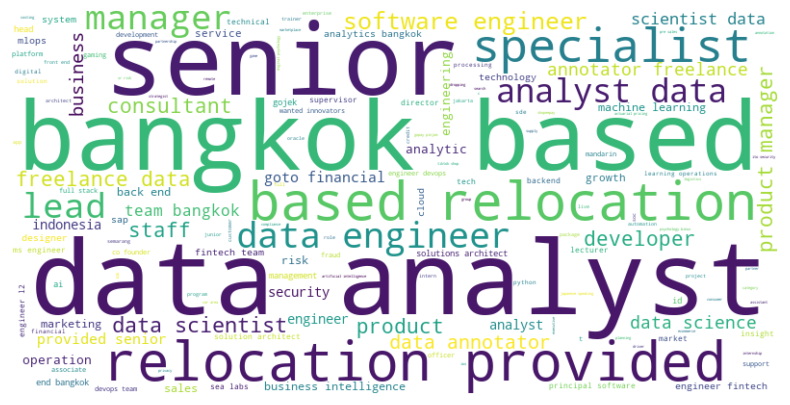

In [24]:
# Combine all job titles into a single string
text = ' '.join(df['job_title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Skills

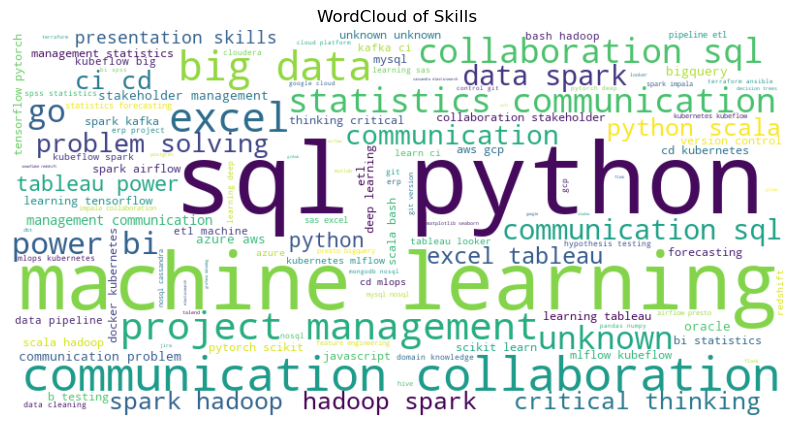

In [25]:

# Menggabungkan semua list 'skills' menjadi satu string
all_skills = ' '.join([' '.join(skill_list) for skill_list in df['skills']])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title("WordCloud of Skills")
plt.show()


### Location


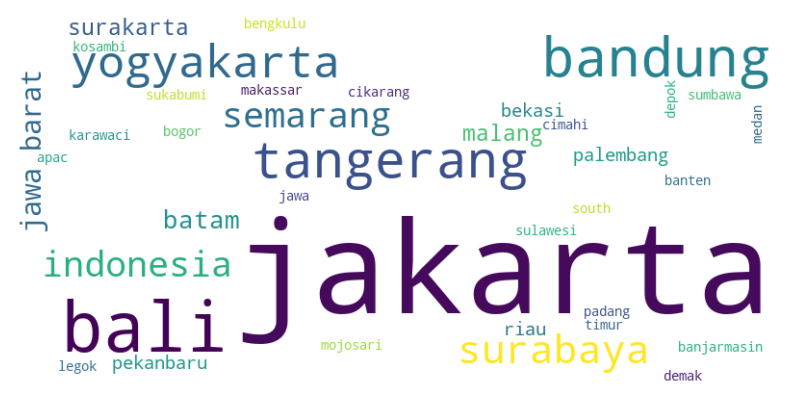

In [26]:
# Combine all locations into a single string
locations_text = ' '.join(df['location'])

# Generate the word cloud
locations_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(locations_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(locations_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()